<a href="https://colab.research.google.com/github/Ghiscode/Pengolahan-Citra-Digital/blob/main/Segmentasi-Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Threshold**

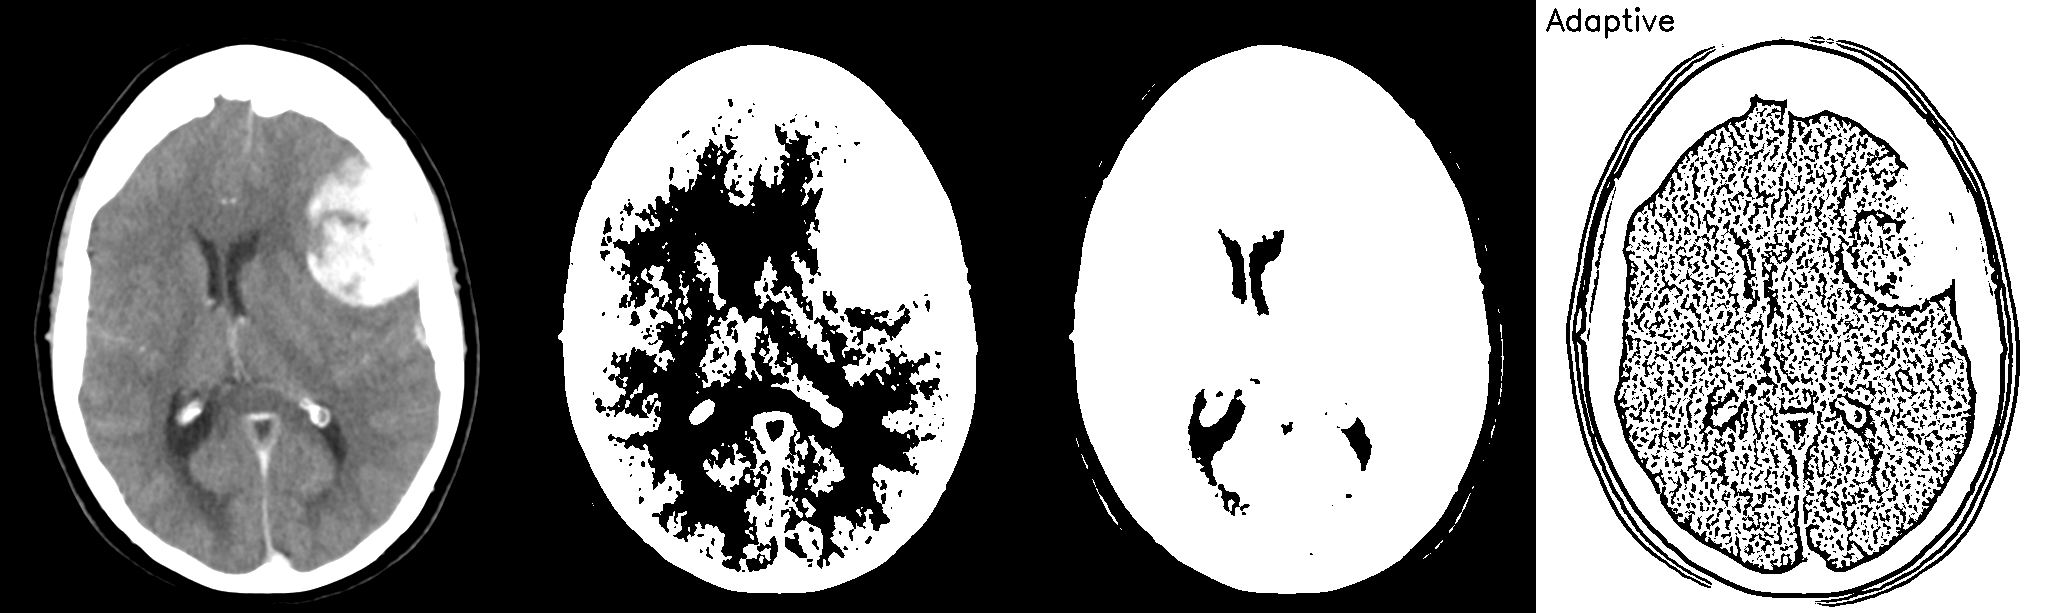

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


# Membaca citra dalam mode grayscale
img = cv2.imread('otak.png', 0)

# Menggunakan metode thresholding global
_, thresh = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)

#otsu
_, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#adaptive thresh
adaptive_thresh = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2
)




cv2.putText(img, 'Original', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(thresh, 'Thresholding', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(otsu, 'Otsu', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(adaptive_thresh, 'Adaptive', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

# Gabungkan dua gambar horizontal
combined = cv2.hconcat([img, thresh,otsu,adaptive_thresh])

# Menampilkan hasil
cv2_imshow(combined)

**Tumor pada Citra MRI Otak** : Disini menggunakan Threshold, mengapa? karena cukup efektif karena tinggal menentukan nilai ambang batas (threshold value), seperti "Semua piksel dengan nilai kecerahan di atas 200 adalah tumor". dan itu akan menjadi metode paling standar dan sederhana pada kasus MRI otak

**2. Edge-Based Segmentation**



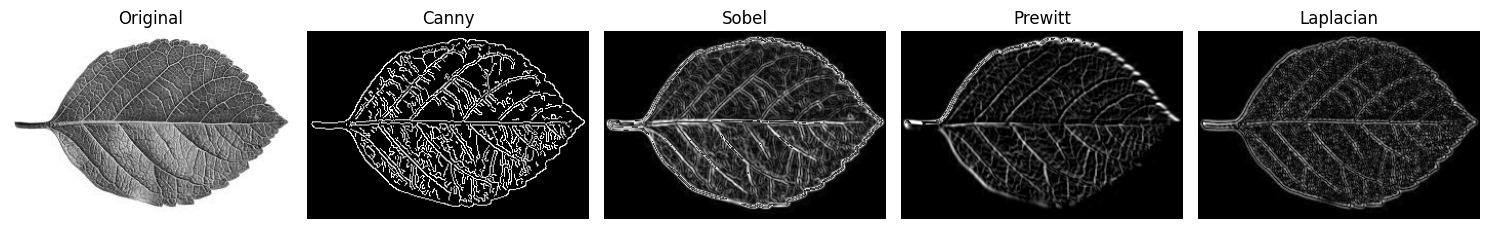

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#baca gambar grayscale
img = cv2.imread('daun.jpeg', 0)

#pake gausian Blur
blur = cv2.GaussianBlur(img, (5,5), 0)

#Canny Method
edges_canny = cv2.Canny(blur, 60, 100)

# Sobel Method
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel = cv2.magnitude(sobelx, sobely)
edges_sobel = np.uint8(edges_sobel)

# Prewitt Method
# Prewitt menggunakan kernel manual
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewittx = cv2.filter2D(blur, -1, kernelx)
prewitty = cv2.filter2D(blur, -1, kernely)
edges_prewitt = prewittx + prewitty

# Laplacian Method
edges_laplacian = cv2.Laplacian(blur, cv2.CV_64F)
edges_laplacian = np.uint8(np.absolute(edges_laplacian))

# --- VISUALISASI SEMUA HASIL ---
titles = ['Original', 'Canny', 'Sobel', 'Prewitt', 'Laplacian']
images = [img, edges_canny, edges_sobel, edges_prewitt, edges_laplacian]

plt.figure(figsize=(15,6))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

**Segmentasi Daun dari Background** : Disini menggunakan Edge-Based Segmentation, karena daun memiliki bentuk yang unik dan tepian yang cukup tajam sehingga memisahkannya dari latar belakang, dengan cara kerja edge-based segmentation yang mendeteksi perubahan drastis pada intensitas piksel garis sehingga membuat metode ini cocok untuk segmentasi daun dari background

**3. Region-Based Segmentation**

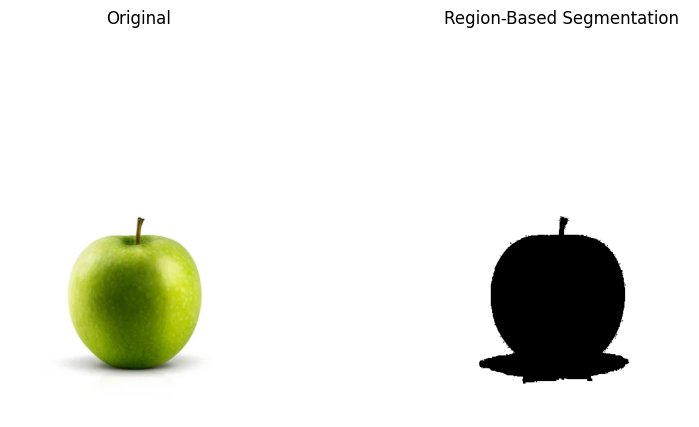

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dan ubah ke grayscale
img = cv2.imread('Apel.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Tentukan titik awal (seed)
seed_point = (150, 150)  # misalnya koordinat tengah daun
threshold = 5  # toleransi kesamaan warna

# Inisialisasi
height, width = gray.shape
mask = np.zeros((height, width), np.uint8)
stack = [seed_point]
seed_value = gray[seed_point[1], seed_point[0]]

# Region growing loop
while len(stack) > 0:
    x, y = stack.pop()
    if mask[y, x] == 0:
        if abs(int(gray[y, x]) - int(seed_value)) < threshold:
            mask[y, x] = 255
            for nx in range(max(x-1,0), min(x+2,width)):
                for ny in range(max(y-1,0), min(y+2,height)):
                    if mask[ny, nx] == 0:
                        stack.append((nx, ny))

# Visualisasi hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Region-Based Segmentation')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.show()


**Segmentasi Buah Apel** : Buah seperti apel memiliki tekstur yang seragam di bagian dalamnya, dengan menggunakan metode ini tepi pada jeruk, tekstur kulit yang mungkin akan dianggap sebagai tepi. dengan region based, algoritma akan mengenali bahwa "Area hijau ini adalah satu kesatuan obyek", sehingga buah terpisah utuh dari sekitarnya